In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

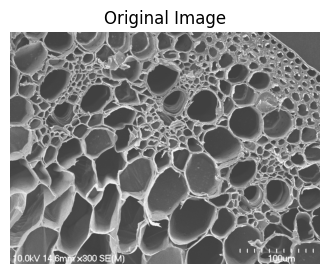

In [3]:
#Load the image
#Load image
image_path = '/content/drive/My Drive/circles.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
assert image is not None, "Not found, check with os.path.exists() with os module"

#Show image
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

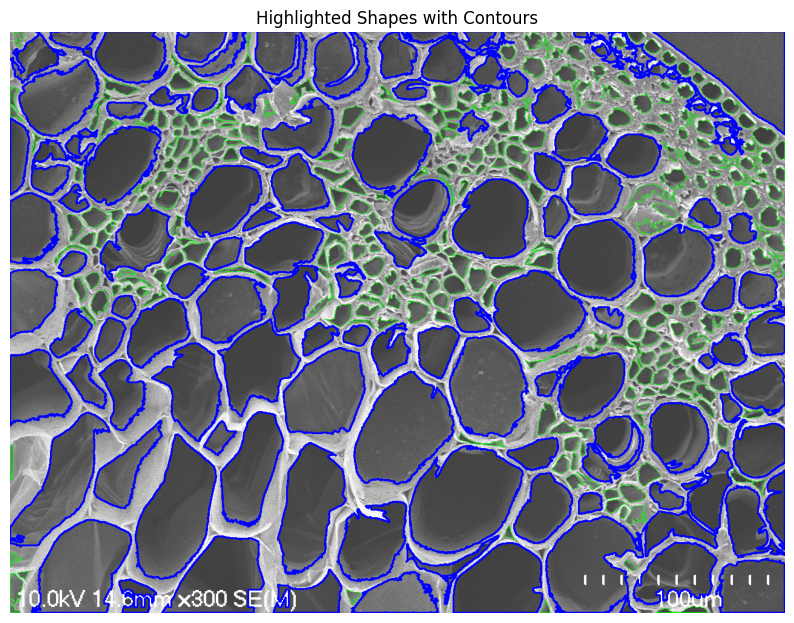

[(0, 0.0, 0.0),
 (1, 2.0, 0.0),
 (2, 3.414213538169861, 0.5),
 (3, 0.0, 0.0),
 (4, 0.0, 0.0),
 (5, 0.0, 0.0),
 (6, 0.0, 0.0),
 (7, 2.0, 0.0),
 (8, 0.0, 0.0),
 (9, 54.72792184352875, 83.5),
 (10, 0.0, 0.0),
 (11, 0.0, 0.0),
 (12, 0.0, 0.0),
 (13, 2.0, 0.0),
 (14, 0.0, 0.0),
 (15, 3.414213538169861, 0.5),
 (16, 0.0, 0.0),
 (17, 0.0, 0.0),
 (18, 0.0, 0.0),
 (19, 0.0, 0.0),
 (20, 0.0, 0.0),
 (21, 0.0, 0.0),
 (22, 0.0, 0.0),
 (23, 193.49747359752655, 439.5),
 (24, 0.0, 0.0),
 (25, 0.0, 0.0),
 (26, 0.0, 0.0),
 (27, 0.0, 0.0),
 (28, 4.0, 0.0),
 (29, 0.0, 0.0),
 (30, 2.0, 0.0),
 (31, 0.0, 0.0),
 (32, 15.071067690849304, 4.5),
 (33, 0.0, 0.0),
 (34, 0.0, 0.0),
 (35, 9.656854152679443, 4.0),
 (36, 56.14213526248932, 105.0),
 (37, 11.41421353816986, 3.5),
 (38, 0.0, 0.0),
 (39, 0.0, 0.0),
 (40, 8.828427076339722, 3.0),
 (41, 10.242640614509583, 3.5),
 (42, 0.0, 0.0),
 (43, 0.0, 0.0),
 (44, 6.828427076339722, 0.0),
 (45, 0.0, 0.0),
 (46, 0.0, 0.0),
 (47, 10.242640614509583, 1.5),
 (48, 0.0, 0.0),


In [5]:
# Convert the image to grayscale for processing
gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)

# Apply binary thresholding for edge detection
_, threshold_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Perimeter and area for each contour
contour_data = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    contour_data.append((contour, perimeter, area))

# Set a threshold to classify big and small circles based on area
area_threshold = 1000 # This can be adjusted for requirement
min_area_threshold = 100 # Minimum area to filter out tiny circles

# Separate big and small circles
big_circles = [data[0] for data in contour_data if data[2] > area_threshold]
small_circles = [data[0] for data in contour_data if min_area_threshold < data[2] <= area_threshold]

# Draw contours on original image
contour_image = np.array(image)
cv2.drawContours(contour_image, big_circles, -1, (255, 0, 0), 2) # Big circles in blue, represents Parenchymatic cells
cv2.drawContours(contour_image, small_circles, -1, (0, 255, 0), 1) # Small circles in green, represents Sclerenchyma cells

# Display with colors
plt.figure(figsize = (10, 8))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Highlighted Shapes with Contours')
plt.show()

contour_details = [(i, data[1], data[2]) for i, data in enumerate(contour_data)]

contour_details